In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Neural Network models

In [3]:
data = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(data)

In [5]:
df.HeartDiseaseorAttack.value_counts(normalize=False)

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [6]:
df_non_heart = df[df.HeartDiseaseorAttack==0]
df_non_heart = df_non_heart.sample(int(df.HeartDiseaseorAttack.value_counts()[1]))
df_non_heart
df_heart = df[df.HeartDiseaseorAttack==1]
df_small = pd.concat([df_non_heart, df_heart])
df_small

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
36817,0.0,0.0,0.0,1.0,32.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,4.0,6.0
7484,0.0,1.0,0.0,1.0,24.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,10.0,0.0,0.0,1.0,12.0,6.0,8.0
217424,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0
98688,0.0,1.0,1.0,1.0,33.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,4.0,4.0,30.0,1.0,0.0,10.0,4.0,3.0
104153,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0


In [7]:
X = df_small.drop(columns='HeartDiseaseorAttack')
y = df_small['HeartDiseaseorAttack'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [41]:
print(df_small.dtypes)
df_small.shape

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


(47786, 22)

In [8]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(21, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(.25))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
type(np.array(y_test)), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [12]:
history = model.fit(
    X_train, np.array(y_train),
    validation_data=(X_test, np.array(y_test)),
    epochs=20,
    verbose=1
)

Epoch 1/20
1120/1120 [==============================] - 6s 2ms/step - loss: 0.6246 - accuracy: 0.6588 - val_loss: 0.5356 - val_accuracy: 0.7665
Epoch 2/20
1120/1120 [==============================] - 3s 3ms/step - loss: 0.5672 - accuracy: 0.7170 - val_loss: 0.5157 - val_accuracy: 0.7613
Epoch 3/20
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5437 - accuracy: 0.7484 - val_loss: 0.5065 - val_accuracy: 0.7668
Epoch 4/20
1120/1120 [==============================] - 3s 3ms/step - loss: 0.5378 - accuracy: 0.7517 - val_loss: 0.5022 - val_accuracy: 0.7642
Epoch 5/20
1120/1120 [==============================] - 3s 2ms/step - loss: 0.5306 - accuracy: 0.7524 - val_loss: 0.4998 - val_accuracy: 0.7641
Epoch 6/20
1120/1120 [==============================] - 3s 3ms/step - loss: 0.5308 - accuracy: 0.7543 - val_loss: 0.4967 - val_accuracy: 0.7668
Epoch 7/20
1120/1120 [==============================] - 3s 3ms/step - loss: 0.5318 - accuracy: 0.7518 - val_loss: 0.4977 - val_accuracy:

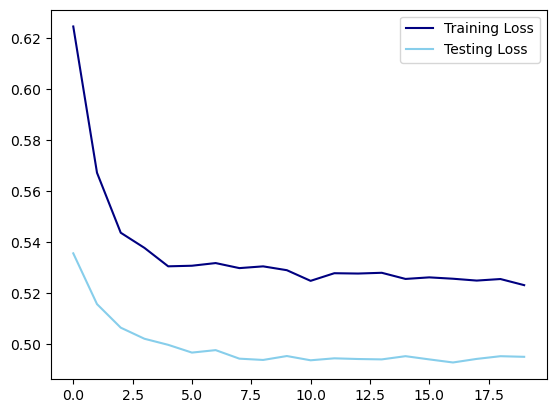

In [13]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing Loss', color='skyblue')
plt.legend();

In [ ]:
preds = model.predict(X_test)

In [4]:
# confusion_matrix()
# ConfusionMatrixDisplay.from_predictions(y_test, preds.round(), display_labels=['No HDA', 'Yes HDA'])
# plt.title('Sequential Neural Net');

In [3]:
# with open('models/nn.pkl', 'wb') as pickle_out:
#     pickle.dump(model, pickle_out)